## DATASET

In [4]:
from dataset_creation import getDataset
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train_blurred, x_train), (x_test_blurred, x_test)  = getDataset()

Resolution $32*32$

In [6]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
# The dataset is already normalized
x_train[0].min(), x_train[0].max()

(0.0, 1.0)

Let's see some examples

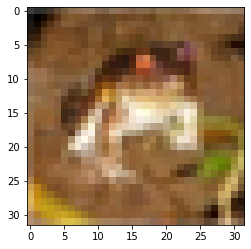

In [7]:
plt.imshow(x_train[0])

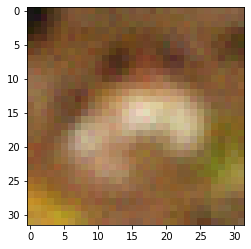

In [8]:
plt.imshow(x_train_blurred[0])

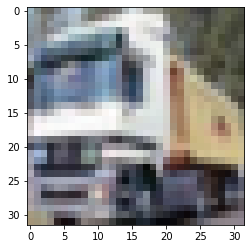

In [ ]:
plt.imshow(x_train[1])

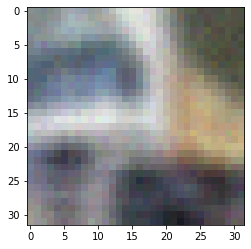

In [ ]:
plt.imshow(x_train_blurred[1])

## MODEL

In [10]:
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose
from tensorflow.keras import Model

In [31]:
# 32*32*3 = 3072
xin = Input(shape=(32,32,3))

x = Conv2D(filters=16, kernel_size=3, strides=2, padding='same')(xin)

x = Conv2D(filters=32, kernel_size=3, strides=2, padding='same')(x)

# 4*4*64 = 576. This is the encoding.
x = Conv2D(filters=64, kernel_size=3, strides=2, padding='same')(x)

#x = Conv2D(filters=128, kernel_size=3, strides=2, padding='valid')(x)

#x = Conv2DTranspose(filters=64, kernel_size=3, strides=2, padding='valid')(x)

x = Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding='same')(x)

x = Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding='same')(x)

y = Conv2DTranspose(filters=3, kernel_size=3, strides=2, padding='same', activation='sigmoid')(x)

model = Model(inputs=xin, outputs=y)

In [26]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 16)        448       
                                                                 
 conv2d_22 (Conv2D)          (None, 8, 8, 32)          4640      
                                                                 
 conv2d_23 (Conv2D)          (None, 4, 4, 64)          18496     
                                                                 
 conv2d_transpose_13 (Conv2D  (None, 8, 8, 32)         18464     
 Transpose)                                                      
                                                                 
 conv2d_transpose_14 (Conv2D  (None, 16, 16, 16)       4624      
 Transpose)                                                

## TRAINING

In [27]:
from tensorflow.keras.optimizers import Adam

In [32]:
model.compile(optimizer=Adam(), loss='mse')

In [33]:
from tensorflow.keras.callbacks import ModelCheckpoint

callback_checkpoint = ModelCheckpoint('ConvAutoencoder.{epoch:02d}-{val_loss:.4f}.hdf5', save_weights_only=True) 

In [34]:
hist = model.fit(x_train_blurred, x_train, epochs=15, validation_split=0.2, callbacks=[callback_checkpoint])

Epoch 1/15
1250/1250 [==============================] - 28s 22ms/step - loss: 0.0093 - val_loss: 0.0053
Epoch 2/15
1250/1250 [==============================] - 28s 22ms/step - loss: 0.0051 - val_loss: 0.0048
Epoch 3/15
1250/1250 [==============================] - 28s 22ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 4/15
1250/1250 [==============================] - 28s 22ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch 5/15
1250/1250 [==============================] - 29s 23ms/step - loss: 0.0044 - val_loss: 0.0043
Epoch 6/15
1250/1250 [==============================] - 28s 22ms/step - loss: 0.0043 - val_loss: 0.0043
Epoch 7/15
1250/1250 [==============================] - 28s 22ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 8/15
1250/1250 [==============================] - 28s 22ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 9/15
1250/1250 [==============================] - 28s 22ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 10/15
1250/1250 [==============================] - 28s 22m

In [37]:
def plot_history(training_history, n_epochs=None):
    if not n_epochs:
      n_epochs = len(training_history.history['loss'])

    epochs = range(1,n_epochs+1)

    plt.plot(epochs, training_history.history['loss'], label='train_loss')
    plt.plot(epochs, training_history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.grid()
    plt.xlabel('Number of epochs')
    plt.title('Loss')

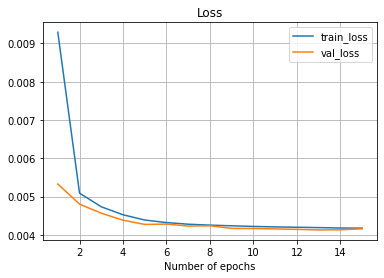

In [38]:
plot_history(hist)

Final score on the test set. Better than the Dense autoencoder.

In [40]:
from tensorflow.keras.losses import MeanSquaredError
mse = MeanSquaredError()
mse(x_test, model.predict(x_test_blurred)).numpy()

0.004173997